# ADS Data Visualization Assignment 5.
You have been provided with data from the Titanic Passenger Roaster, depicting if an individual survived the sinking of the ship or not. ‘Survived’ is denoted by (1) and ‘Did Not Survive’ is denoted by (0). Only using Plotly, graph the following information from the data. Feel free to use any of the Plotly submodules discussed (graph_objects, plotly express or iplot). Remember to label your axis and name your plots appropriately. For each given question, only one figure is expected.

1. Show the age distribution in the data using a histogram.
2. Show the age distribution based on gender using a histogram.
3. Using the function df.corr() to identify the correlation within the data, represent its results using a form of a matrix plot.
4. Pivot the data setting the column Pclass as the columns and Fare as the values. From the resulting structure, use a boxplot to show the distribution of the values in its 3 columns.
5. Graph the value counts of the number of passengers who survived and did not survive based on gender using a stacked bar graph.
6. Using a scatter plot, plot the ages to the fare paid by the each passenger based on their gender.
7. Plot a bubble plot of the ages to the fare paid by each passenger categorizing whether they survived or not. The size of each bubble should be determined by the passenger class and the name of each individual as the hover name.

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

In [5]:
Titanic = pd.read_csv('TitanicData.csv')
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
Titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#drop cabin - too many nulls
Titanic.drop('Cabin',axis='columns', inplace=True)
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
Titanic["Age"].mean()

29.69911764705882

In [9]:
#fill missing values in age

Titanic['Age'].fillna((Titanic['Age'].mean()), inplace=True)

Titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

# a) Show the age distribution in the data using a histogram.

<Figure size 720x576 with 0 Axes>

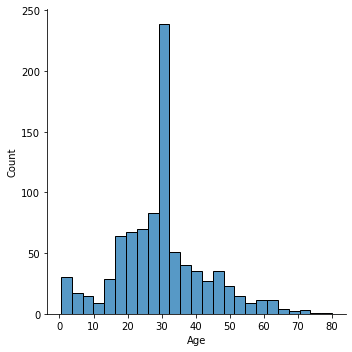

In [10]:


plt.figure(figsize=(10,8))
sns.displot(Titanic, 
            x="Age", 
            bins=25)
plt.savefig("Seaborn_histogram_with_displot.png",
                    format='png',dpi=150)

# b.Show the age distribution based on gender using a histogram.

In [32]:

    
Titanic.groupby(['Age','Sex']).count()


,
Age,Sex
0.42,male
0.67,male
0.75,female
0.83,male
0.92,male
...,...
70.00,male
70.50,male
71.00,male


<AxesSubplot:ylabel='Frequency'>

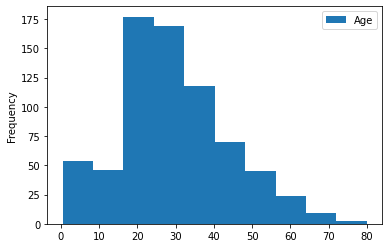

In [9]:
Titanic.plot( x='Sex', y='Age', kind='hist')

# Using the function df.corr() to identify the correlation within the data,represent its results using a form of a matrix plot.


In [10]:

Titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


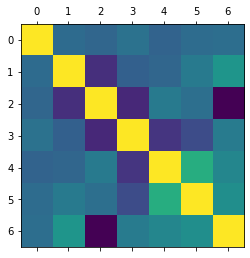

In [13]:
import matplotlib.pyplot as plt

plt.matshow(Titanic.corr())
plt.show()

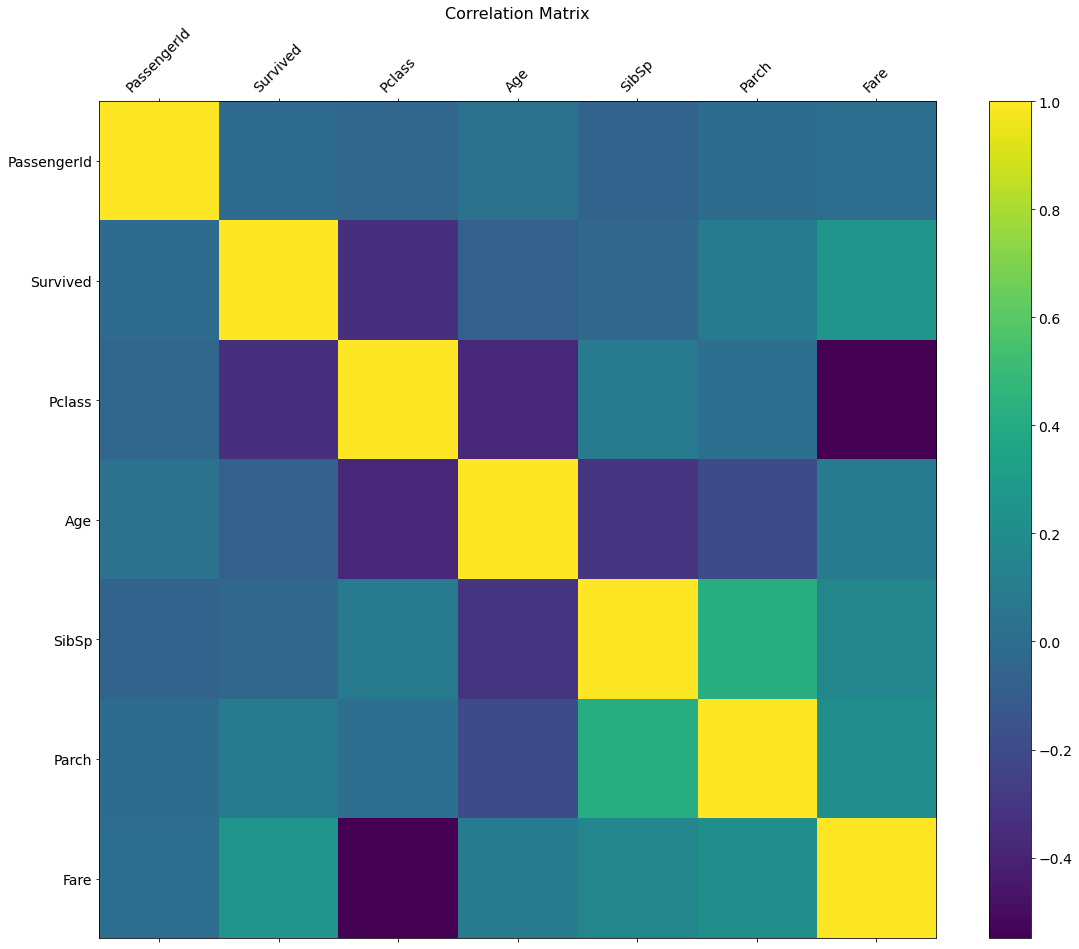

In [14]:
f = plt.figure(figsize=(19, 15))
plt.matshow(Titanic.corr(), fignum=f.number)
plt.xticks(range(Titanic.select_dtypes(['number']).shape[1]), Titanic.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(Titanic.select_dtypes(['number']).shape[1]), Titanic.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Pivot the data setting the column Pclass as the columns and Fare as the values. From the resulting structure, use a boxplot to show the distribution of the values in its 3 columns.

In [17]:


pivot=Titanic.pivot_table('Fare', columns='Pclass')
pivot

Pclass,1,2,3
Fare,84.154687,20.662183,13.67555


<AxesSubplot:>

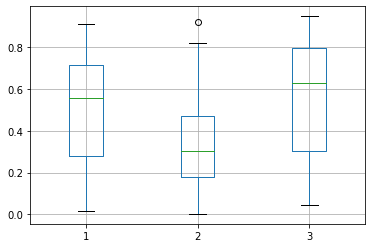

In [20]:

pivot = pd.DataFrame(np.random.rand(10, 3), columns=['1', '2', '3'])
pivot.plot.box(grid='True')

# Graph the value counts of the number of passengers who survived and did not survive based on gender using a stacked bar graph

In [22]:

Titanic.groupby(['Survived','Sex']).Survived.count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

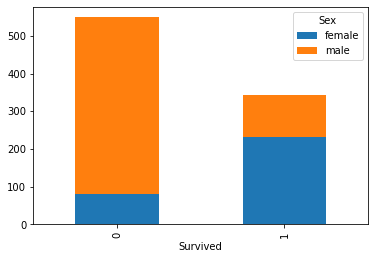

In [28]:
Titanic.groupby(["Survived", "Sex"])["Survived"].count().unstack().plot(kind = "bar", stacked = True)
plt.show()

# Using a scatter plot, plot the ages to thefare paid by the each passenger based on their gender.

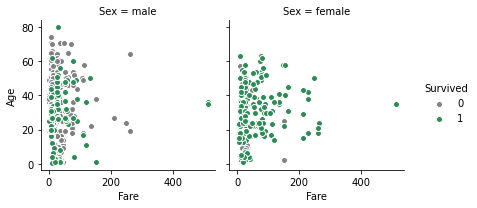

In [37]:

g = sns.FacetGrid(Titanic, hue="Survived", col="Sex", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

# Plot a bubble plot of the ages to the fare paid by each passenger categorizing whether they survived or not. The size of each bubble should be determined by the passenger class and the name of each individual as the hover name.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

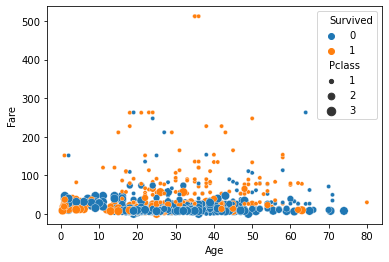

In [61]:


sns.scatterplot(data=Titanic, x='Age',y='Fare',hue='Survived',size='Pclass',hover='Name')